In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

## Leauge of Legends Champion Complexity EDA
##### By: Ryan Stevens
##### For: DSCI 235

#### Context:
The purpose of this project is to determine a method to quantitatively measure champion complexity in the online video game League of Legends. This is useful because champion complexity is a highly contentious topic when it comes to balance and new character releases. By identifying this metric quantitatively, we can identify more relationships between character complexity and long-term performance to make development choices.



First, let's load the dataset

In [2]:
data = pd.read_json('distribution.json')

In [3]:
data = data[:200]

In [4]:
d2_data = pd.read_json('data_d2_1000_10.json')

In [5]:
d2_data = d2_data[:200]

We'll validate the data is in the format we want

In [6]:
d2_data.head(2)

,metadata,info
0,"{'dataVersion': '2', 'matchId': 'NA1_525689035...","{'endOfGameResult': 'GameComplete', 'gameCreat..."
1,"{'dataVersion': '2', 'matchId': 'NA1_525686558...","{'endOfGameResult': 'GameComplete', 'gameCreat..."


In [7]:
cleaned_dist = pd.DataFrame(data['info'].to_list())
cleaned_d2 = pd.DataFrame(d2_data['info'].to_list())

In [8]:
cleaned_dist = [c for p in cleaned_dist['participants'] for c in p[:10]]
cleaned_dist = pd.DataFrame(cleaned_dist)

cleaned_d2 = [c for p in cleaned_d2['participants'] for c in p[:10]]
cleaned_d2 = pd.DataFrame(cleaned_d2)

The Riot API uses a number of DTOs (Data Transfer Objects), which come in the form of dictionaries nested in the match data. In order to process our data further, we will need to flatten these.

In [9]:
cleaned_dist = cleaned_dist.apply(lambda row: row.map(lambda x: str(x) if isinstance(x, dict) else x), axis=1)
cleaned_dist = cleaned_dist.drop_duplicates()

cleaned_d2 = cleaned_d2.apply(lambda row: row.map(lambda x: str(x) if isinstance(x, dict) else x), axis=1)
cleaned_d2 = cleaned_d2.drop_duplicates()

Let's look at the relationship between spell casts and characters

In [10]:
grouped_dist = cleaned_dist.groupby('championName')
casts_dist = grouped_dist[['spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts']].mean().sum(axis=1).sort_values(ascending=False)

grouped_d2 = cleaned_d2.groupby('championName')
casts_d2 = grouped_d2[['spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts']].mean().sum(axis=1).sort_values(ascending=False)

<Axes: xlabel='championName'>

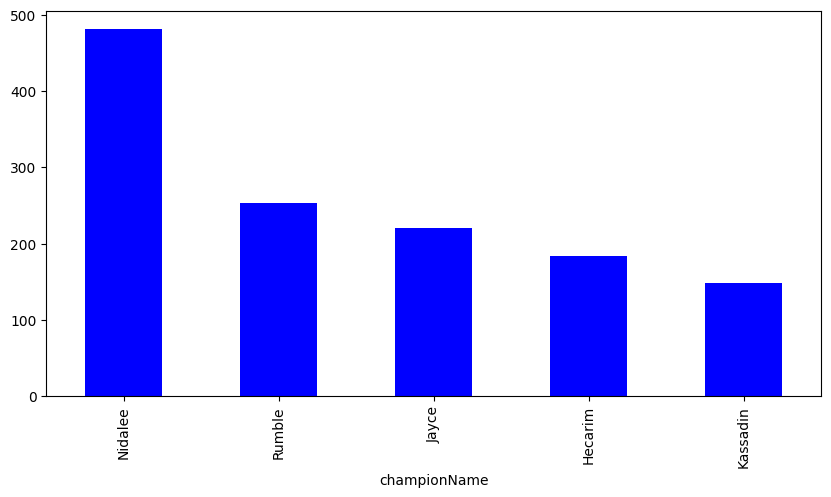

In [11]:
diff = casts_d2 - casts_dist
diff.sort_values(ascending=False, inplace=True)
diff[:5].plot(kind='bar', figsize=(10, 5), color='blue')

<Axes: xlabel='championName'>

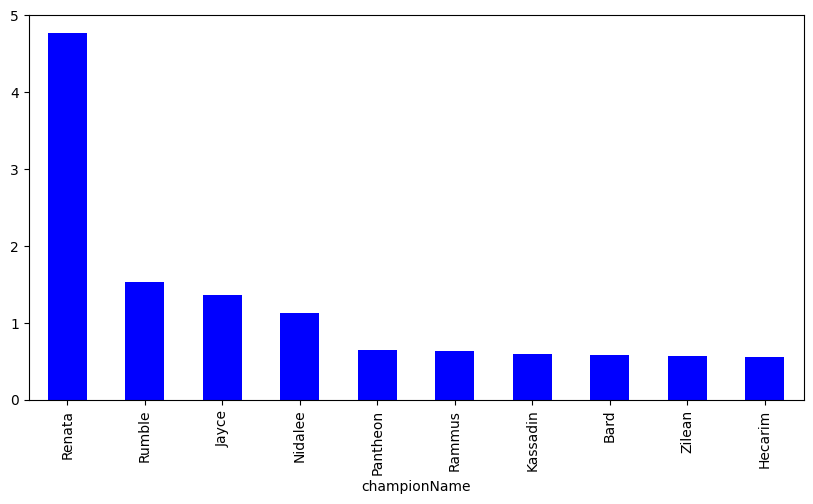

In [12]:
proportional_diff = diff / casts_dist
proportional_diff.sort_values(ascending=False, inplace=True)
proportional_diff[:10].plot(kind='bar', figsize=(10, 5), color='blue')

<Axes: xlabel='championName'>

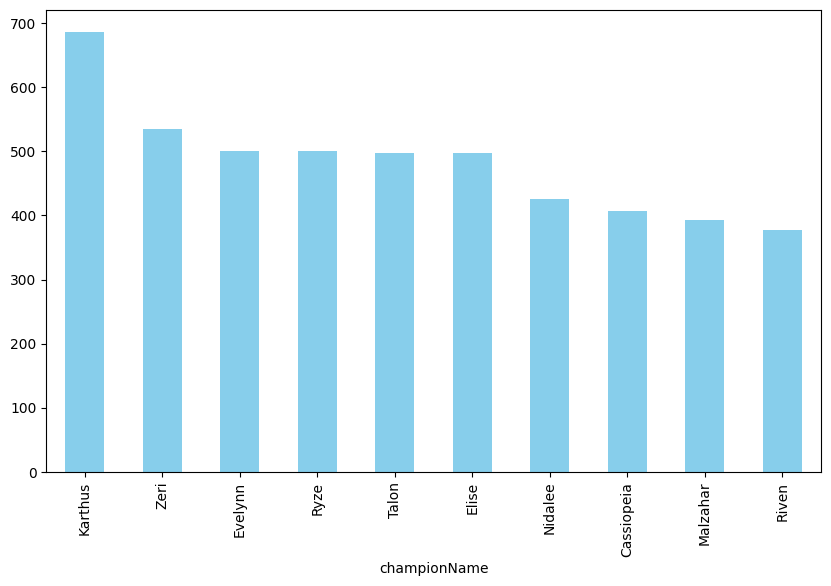

In [13]:
casts_dist[:10].plot(kind='bar', figsize=(10, 6), color='skyblue')

<Axes: xlabel='championName'>

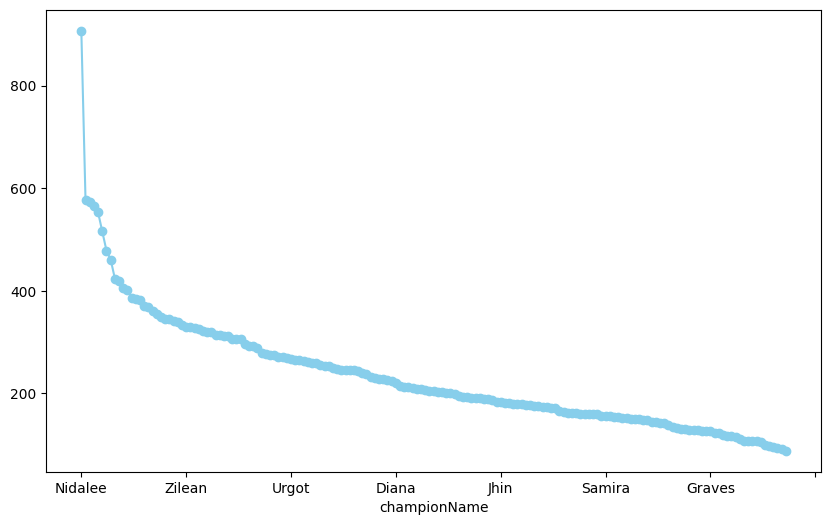

In [14]:
casts_d2.plot(kind='line', figsize=(10, 6), color='skyblue', marker='o')

<Axes: xlabel='championName'>

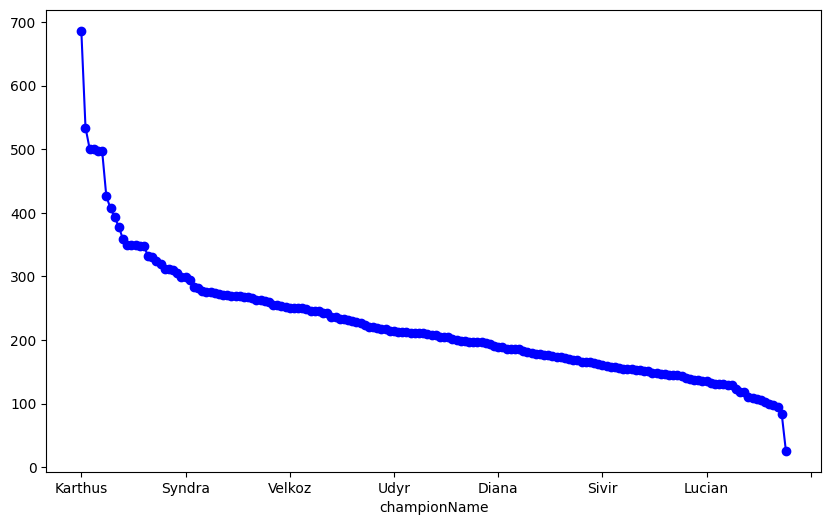

In [15]:
casts_dist.plot(kind='line', figsize=(10, 6), color='blue', marker='o')

<Axes: xlabel='championName'>

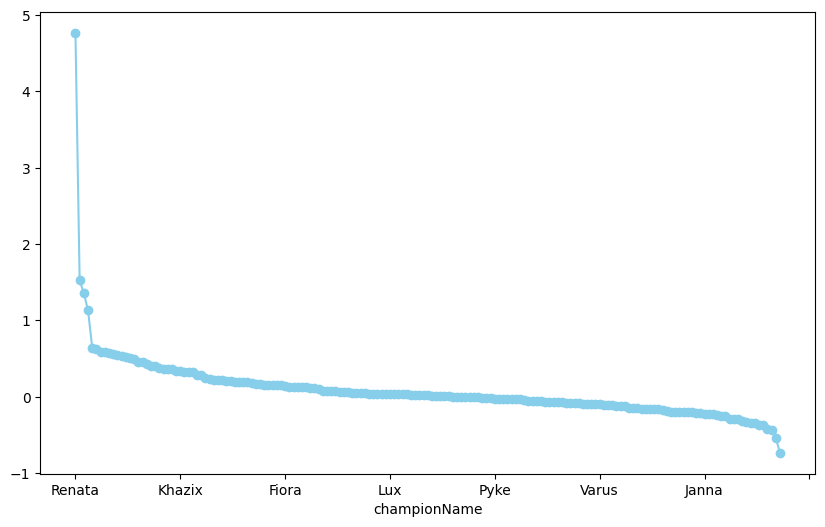

In [16]:
proportional_diff.plot(kind='line', figsize=(10, 6), color='skyblue', marker='o')

<Axes: xlabel='championName'>

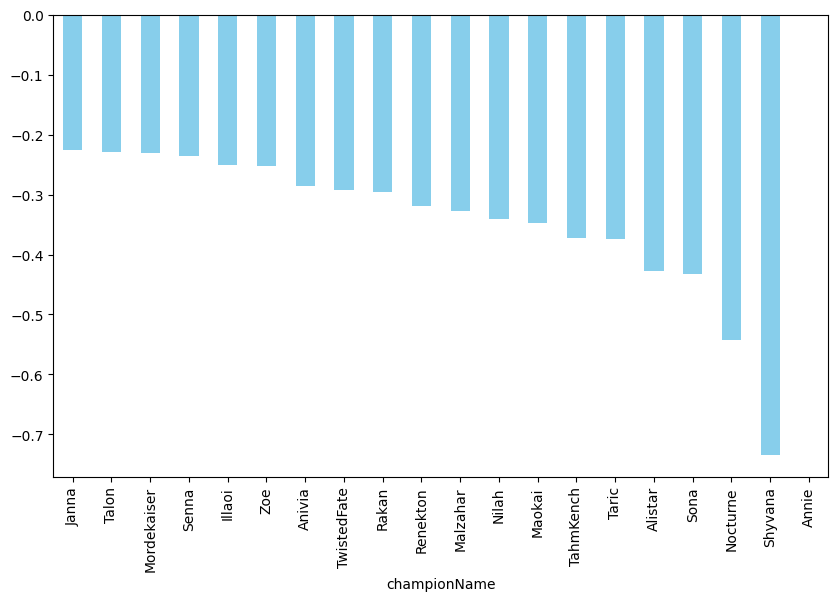

In [17]:
proportional_diff[-20:].plot(kind='bar', figsize=(10, 6), color='skyblue')

In [60]:
import ast

d2_df = cleaned_d2['challenges']
dicts = cleaned_d2['challenges'].apply(ast.literal_eval)
challenge_df = pd.json_normalize(dicts)
print(challenge_df.shape)

(1990, 141)


In [65]:
d2_df[0]

"{'12AssistStreakCount': 0, 'HealFromMapSources': 364.606201171875, 'InfernalScalePickup': 0, 'SWARM_DefeatAatrox': 0, 'SWARM_DefeatBriar': 0, 'SWARM_DefeatMiniBosses': 0, 'SWARM_EvolveWeapon': 0, 'SWARM_Have3Passives': 0, 'SWARM_KillEnemy': 0, 'SWARM_PickupGold': 0, 'SWARM_ReachLevel50': 0, 'SWARM_Survive15Min': 0, 'SWARM_WinWith5EvolvedWeapons': 0, 'abilityUses': 156, 'acesBefore15Minutes': 0, 'alliedJungleMonsterKills': 2, 'baronTakedowns': 0, 'blastConeOppositeOpponentCount': 0, 'bountyGold': 0, 'buffsStolen': 1, 'completeSupportQuestInTime': 0, 'controlWardTimeCoverageInRiverOrEnemyHalf': 0.798636859476999, 'controlWardsPlaced': 1, 'damagePerMinute': 567.2029068495971, 'damageTakenOnTeamPercentage': 0.253594936104441, 'dancedWithRiftHerald': 0, 'deathsByEnemyChamps': 5, 'dodgeSkillShotsSmallWindow': 0, 'doubleAces': 0, 'dragonTakedowns': 0, 'earlyLaningPhaseGoldExpAdvantage': 0, 'effectiveHealAndShielding': 0, 'elderDragonKillsWithOpposingSoul': 0, 'elderDragonMultikills': 0, 'ene

In [67]:
challenge_df.head(2)    

,12AssistStreakCount,HealFromMapSources,InfernalScalePickup,SWARM_DefeatAatrox,SWARM_DefeatBriar,SWARM_DefeatMiniBosses,SWARM_EvolveWeapon,SWARM_Have3Passives,SWARM_KillEnemy,SWARM_PickupGold,...,highestCrowdControlScore,highestWardKills,fastestLegendary,highestChampionDamage,fasterSupportQuestCompletion,baronBuffGoldAdvantageOverThreshold,earliestBaron,shortestTimeToAceFromFirstTakedown,earliestElderDragon,hadAfkTeammate
0,0,364.606201,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.000000,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
non_numeric_cols = challenge_df.select_dtypes(exclude='number').columns.tolist()
print(non_numeric_cols)


['legendaryItemUsed']


In [56]:
type(challenge_df)

pandas.core.frame.DataFrame

In [57]:
test = [[1, 4 ,3], 
        [2, 5, 3],
        [3, 9, 3],]
test = pd.DataFrame(test)
scaler = StandardScaler()
scaler.fit_transform(test)

array([[-1.22474487, -0.9258201 ,  0.        ],
       [ 0.        , -0.46291005,  0.        ],
       [ 1.22474487,  1.38873015,  0.        ]])

In [58]:
challenge_df = challenge_df.drop(columns=non_numeric_cols)

In [59]:

scaler = StandardScaler()
challenge_df_scaled = pd.DataFrame(scaler.fit_transform(challenge_df), columns=challenge_df.columns, index=challenge_df.index)


In [ ]:
# "“How much does this champ’s stats shift with skill relative to the global trend?”"

In [ ]:
# wanna look at timeline data too
# and maybe fit a network to predict something-- like rank based on the stats you're good at?
       # idk just find something that would be valuable to predict

#also check chatgpt for the summary of conversation; I think this will be cool!!